In [1]:
# Import necessary libraries
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
train = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)

In [3]:
train.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 507 entries, id to activity-0:00
dtypes: float64(432), object(75)
memory usage: 14.1+ MB


In [7]:

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

# Map p_num and process time directly
train['p_num'] = train['p_num'].map(mapping_dict)
train['time'] = pd.to_datetime(train['time'], format='%H:%M:%S').dt.time
#train['hour'] = train['time'].dt.hour
#train['minute'] = train['time'].dt.minute
#train.drop('time', axis=1, inplace=True)

# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

# Output the processed DataFrame for verification
train.head()


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,0,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,0,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,0,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,0,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,0,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [8]:
# If your `time` column is of type datetime.time, convert it to seconds since midnight
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [9]:

# Apply this function to your time-related column
train.loc[:, 'time_in_seconds'] = train['time'].apply(time_to_seconds)


# Ensure that the 'time_in_seconds' column is of type int
train.loc[:, 'time_in_seconds'] = train['time_in_seconds'].astype(int)


# Remove the original 'time' column if no longer needed
train = train.drop(columns=['time'])



# Now, verify the types again
print(train.dtypes)  # Should show 'time_in_seconds' as int

p_num                int64
bg-5:55            float64
bg-5:50            float64
bg-5:45            float64
bg-5:40            float64
                    ...   
activity-0:10       object
activity-0:05       object
activity-0:00       object
bg+1:00            float64
time_in_seconds      int64
Length: 507, dtype: object


In [10]:
import pandas as pd

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

# Map p_num and process time directly
test['p_num'] = test['p_num'].map(mapping_dict)
test['time'] = pd.to_datetime(test['time'], format='%H:%M:%S').dt.time
#test['hour'] = test['time'].dt.hour
#test['minute'] = test['time'].dt.minute
#test.drop('time', axis=1, inplace=True)

if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)


In [11]:

# Apply this function to your time-related column
test.loc[:, 'time_in_seconds'] = test['time'].apply(time_to_seconds)


# Ensure that the 'time_in_seconds' column is of type int
test.loc[:, 'time_in_seconds'] = test['time_in_seconds'].astype(int)


# Remove the original 'time' column if no longer needed
test = test.drop(columns=['time'])



# Now, verify the types again
print(test.dtypes)  # Should show 'time_in_seconds' as int

p_num                int64
bg-5:55            float64
bg-5:50            float64
bg-5:45            float64
bg-5:40            float64
                    ...   
activity-0:15       object
activity-0:10       object
activity-0:05       object
activity-0:00       object
time_in_seconds      int64
Length: 506, dtype: object


In [12]:
train.head(5)

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,time_in_seconds
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,22200
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,23100
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,24000
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,24900
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,25800


In [13]:
def drop_columns_with_high_nan(df, threshold=0.25):
    """
    Drops columns from the DataFrame if they have more than a specified
    percentage of missing values and returns the names of these columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for missing values (default is 0.25 for 25%).

    Returns:
        tuple: 
            - pd.DataFrame: The DataFrame with columns having more than `threshold`% missing values dropped.
            - list: Names of the columns that were dropped.
    """
    # Calculate the threshold count for missing values
    missing_threshold = len(df) * threshold

    # Identify columns with more missing values than the threshold
    high_nan_columns = df.columns[df.isnull().sum() > missing_threshold].tolist()

    # Drop the identified columns
    cleaned_df = df.drop(columns=high_nan_columns)

    return cleaned_df, high_nan_columns


In [14]:
# Apply the function
train_cleaned, dropped_columns = drop_columns_with_high_nan(train, threshold=0.25)


print("\nDropped Columns:")
print(dropped_columns)

print("Cleaned DataFrame:")
train_cleaned.head()


Dropped Columns:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 'carbs-0:10', '

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,time_in_seconds
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,22200
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,23100
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,24000
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,24900
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,25800


In [15]:


def apply_column_removal_to_test(train_df, test_df, threshold=0.25):
    """
    Applies column removal based on NaN threshold from train data to test data.
    
    Parameters:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.
        threshold (float): The percentage threshold for missing values (default is 0.25 for 25%).

    Returns:
        tuple:
            - pd.DataFrame: Cleaned test DataFrame with columns dropped.
            - list: Names of the columns dropped from the test data.
    """
    # Drop columns in train data and get the names of dropped columns
    _, high_nan_columns_train = drop_columns_with_high_nan(train_df, threshold)

    # Remove the same columns from test data
    cleaned_test_df = test_df.drop(columns=high_nan_columns_train, errors='ignore')

    return cleaned_test_df, high_nan_columns_train


In [16]:
# Apply the function
test_cleaned, dropped_columns = apply_column_removal_to_test(train, test, threshold=0.25)



print("\nDropped Columns from Test Data:")
print(dropped_columns)

print("Cleaned Test DataFrame:")
test_cleaned.head()


Dropped Columns from Test Data:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,time_in_seconds
0,0,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,NaN,...,4.90,4.90,4.80,4.80,4.80,4.80,4.80,4.90,6.06,24300
1,0,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,9.1,...,5.87,9.70,13.92,16.22,16.69,23.12,30.51,24.57,32.43,41100
2,0,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,NaN,...,17.65,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16,53100
3,0,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,NaN,...,4.80,4.80,5.00,4.90,4.90,4.80,4.80,4.90,4.80,16200
4,0,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,12.2,...,4.80,4.80,4.80,4.90,4.80,4.80,4.80,4.80,4.80,15600


In [18]:
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Updated df_train: (177024, 219)
Updated df_test: (3644, 218)


In [19]:
def check_missing_values(df):
    return pd.DataFrame({
        'Missing Values': df.isna().sum(),
        'Percentage (%)': (df.isna().mean() * 100)
    })

In [20]:
missing_info = check_missing_values(train_cleaned)
print(missing_info)

                 Missing Values  Percentage (%)
p_num                         0        0.000000
bg-5:55                   27254       15.395653
bg-5:50                   18491       10.445476
bg-5:45                   13660        7.716468
bg-5:40                   27258       15.397912
...                         ...             ...
cals-0:10                 35273       19.925547
cals-0:05                 35263       19.919898
cals-0:00                 35257       19.916508
bg+1:00                       0        0.000000
time_in_seconds               0        0.000000

[219 rows x 2 columns]


In [21]:
missing_info = check_missing_values(test_cleaned)
print(missing_info)

                 Missing Values  Percentage (%)
p_num                         0        0.000000
bg-5:55                     984       27.003293
bg-5:50                     583       15.998902
bg-5:45                     486       13.336992
bg-5:40                     986       27.058178
...                         ...             ...
cals-0:15                   529       14.517014
cals-0:10                   525       14.407245
cals-0:05                   529       14.517014
cals-0:00                   522       14.324918
time_in_seconds               0        0.000000

[218 rows x 2 columns]


In [22]:
# Identify columns with all missing values
all_missing_columns = train_cleaned.columns[train_cleaned.isnull().all()]
print("Columns with all missing values:", all_missing_columns)

# Drop entirely missing columns
train_cleaned = train_cleaned.drop(columns=all_missing_columns)


Columns with all missing values: Index([], dtype='object')


In [23]:
def check_same_columns(train_df, test_df):
    """
    Checks if train and test DataFrames have the same columns.
    
    Parameters:
        train_df (pd.DataFrame): Training DataFrame.
        test_df (pd.DataFrame): Testing DataFrame.
        
    Returns:
        bool: True if both DataFrames have the same columns, False otherwise.
        list: List of columns not in both DataFrames.
    """
    # Get columns present in each DataFrame
    train_columns = set(train_df.columns)
    test_columns = set(test_df.columns)
    
    # Find columns that are not common in both
    missing_in_train = test_columns - train_columns
    missing_in_test = train_columns - test_columns
    
    # Check if both sets of columns are equal
    if train_columns == test_columns:
        print("Train and test DataFrames have the same columns.")
        return True, []
    else:
        print("Train and test DataFrames do not have the same columns.")
        print("Columns missing in train:", missing_in_train)
        print("Columns missing in test:", missing_in_test)
        return False, list(missing_in_train | missing_in_test)

In [24]:
# Check columns
same_columns, diff_columns = check_same_columns(train_cleaned, test_cleaned)
print("\nColumns that differ:", diff_columns)

Train and test DataFrames do not have the same columns.
Columns missing in train: set()
Columns missing in test: {'bg+1:00'}

Columns that differ: ['bg+1:00']


In [25]:
import pandas as pd

def reduce_memory_usage(df):
    """
    Reduces memory usage of a DataFrame by downcasting numerical columns
    and converting object columns to categorical where possible.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        
    Returns:
        pd.DataFrame: DataFrame with optimized memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2  # Memory usage in MB
    print(f"Initial memory usage of DataFrame: {start_mem:.2f} MB")

    # Iterate over each column to reduce memory usage
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif col_type == 'object' and df[col].nunique() < 0.5 * len(df):
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2  # Memory usage after optimization
    print(f"Reduced memory usage of DataFrame: {end_mem:.2f} MB ({100 * (start_mem - end_mem) / start_mem:.2f}% reduction)")
    
    return df


In [26]:
# Assuming your data is in train_cleaned and test_cleaned
train_cleaned = reduce_memory_usage(train_cleaned)
test_cleaned = reduce_memory_usage(test_cleaned)


Initial memory usage of DataFrame: 295.78 MB
Reduced memory usage of DataFrame: 147.38 MB (50.17% reduction)
Initial memory usage of DataFrame: 6.06 MB
Reduced memory usage of DataFrame: 3.02 MB (50.17% reduction)


In [27]:
import pandas as pd
import logging

# Set up logging configuration
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

def summarize_columns_rolling_mean(df, column_prefix, window_size=3):
    """
    Summarizes columns by computing the rolling mean over specified intervals.
    
    Parameters:
    - df: DataFrame containing the data.
    - column_prefix: Prefix of the columns to summarize (e.g., 'bg').
    - window_size: Number of columns to group together for mean calculation.
    
    Returns:
    - DataFrame with summarized columns by rolling mean.
    """
    logging.info(f"Summarizing columns starting with {column_prefix} using rolling mean (window size: {window_size})")
    
    # Find all columns starting with the specified prefix
    columns = [col for col in df.columns if col.startswith(column_prefix)]
    
    new_column_data = {}
    
    for i in range(len(columns) // window_size):
        cols_to_mean = columns[i * window_size:(i + 1) * window_size]
        
        mean_value = df[cols_to_mean].mean(axis=1)
        new_column_name = f"{cols_to_mean[-1]}"
        new_column_data[new_column_name] = mean_value
    
    summarized_df = pd.DataFrame(new_column_data)
    logging.info(f"Created summarized DataFrame with rolling mean columns")
    
    df = df.drop(columns=columns, errors='ignore')
    df = pd.concat([df, summarized_df], axis=1)
    
    logging.info(f"Updated DataFrame after summarization of {column_prefix}")
    return df

In [28]:
def summarize_columns_sum(df, column_prefix, window_size=3):
    """
    Summarizes columns by computing the sum over specified intervals.
    
    Parameters:
    - df: DataFrame containing the data.
    - column_prefix: Prefix of the columns to summarize (e.g., 'insulin').
    - window_size: Number of columns to group together for sum calculation.
    
    Returns:
    - DataFrame with summarized columns by sum.
    """
    logging.info(f"Summarizing columns starting with {column_prefix} using sum (window size: {window_size})")
    
    columns = [col for col in df.columns if col.startswith(column_prefix)]
    
    new_column_data = {}
    
    for i in range(len(columns) // window_size):
        cols_to_sum = columns[i * window_size:(i + 1) * window_size]
        
        sum_value = df[cols_to_sum].sum(axis=1)
        new_column_name = f"{cols_to_sum[-1]}"
        new_column_data[new_column_name] = sum_value
    
    summarized_df = pd.DataFrame(new_column_data)
    logging.info(f"Created summarized DataFrame with sum columns")
    
    df = df.drop(columns=columns, errors='ignore')
    df = pd.concat([df, summarized_df], axis=1)
    
    logging.info(f"Updated DataFrame after summarization of {column_prefix}")
    return df

In [29]:
def summarize_all_columns(df):
    logging.info("Starting summarization of all columns")
    
    df = summarize_columns_rolling_mean(df, column_prefix='bg-', window_size=3)
    df = summarize_columns_sum(df, column_prefix='insulin', window_size=3)
    df = summarize_columns_sum(df, column_prefix='carbs', window_size=3)
    df = summarize_columns_rolling_mean(df, column_prefix='hr', window_size=3)
    df = summarize_columns_sum(df, column_prefix='steps', window_size=3)
    df = summarize_columns_sum(df, column_prefix='cals', window_size=3)
    
    logging.info("Completed summarization of all columns")
    return df

In [30]:
train_df = summarize_all_columns(train_cleaned)

2024-12-08 18:28:06,197 - INFO - Starting summarization of all columns
2024-12-08 18:28:06,198 - INFO - Summarizing columns starting with bg- using rolling mean (window size: 3)
2024-12-08 18:28:06,527 - INFO - Created summarized DataFrame with rolling mean columns
2024-12-08 18:28:06,655 - INFO - Updated DataFrame after summarization of bg-
2024-12-08 18:28:06,656 - INFO - Summarizing columns starting with insulin using sum (window size: 3)
2024-12-08 18:28:06,989 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:07,053 - INFO - Updated DataFrame after summarization of insulin
2024-12-08 18:28:07,058 - INFO - Summarizing columns starting with carbs using sum (window size: 3)
2024-12-08 18:28:07,059 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:07,104 - INFO - Updated DataFrame after summarization of carbs
2024-12-08 18:28:07,107 - INFO - Summarizing columns starting with hr using rolling mean (window size: 3)
2024-12-08 18:28:07,107 - IN

In [31]:
train_df

,p_num,bg+1:00,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0,13.4,22200,9.600000,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,12.8,23100,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0,15.5,24000,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,14.8,24900,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,12.7,25800,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,12.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,8,11.1,84900,9.033334,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177020,8,10.9,85200,9.233333,10.133333,10.133334,9.500000,8.866666,7.900000,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177021,8,10.7,85500,9.466666,10.299999,9.966667,9.233334,8.633332,7.666667,7.699999,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177022,8,10.5,85800,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25


In [32]:
test_df = summarize_all_columns(test_cleaned)

2024-12-08 18:28:17,043 - INFO - Starting summarization of all columns
2024-12-08 18:28:17,044 - INFO - Summarizing columns starting with bg- using rolling mean (window size: 3)
2024-12-08 18:28:17,069 - INFO - Created summarized DataFrame with rolling mean columns
2024-12-08 18:28:17,074 - INFO - Updated DataFrame after summarization of bg-
2024-12-08 18:28:17,075 - INFO - Summarizing columns starting with insulin using sum (window size: 3)
2024-12-08 18:28:17,090 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:17,091 - INFO - Updated DataFrame after summarization of insulin
2024-12-08 18:28:17,092 - INFO - Summarizing columns starting with carbs using sum (window size: 3)
2024-12-08 18:28:17,092 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:17,094 - INFO - Updated DataFrame after summarization of carbs
2024-12-08 18:28:17,094 - INFO - Summarizing columns starting with hr using rolling mean (window size: 3)
2024-12-08 18:28:17,094 - IN

In [33]:
test_df

,p_num,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0,24300,9.200000,10.200000,10.300000,10.200000,11.700000,13.500000,15.300000,15.000000,...,14.400001,14.500001,14.400001,14.500000,14.400001,14.500001,14.500000,14.600000,14.400001,15.760000
1,0,41100,9.900000,9.400000,9.100000,8.300000,7.700000,7.800000,7.700000,7.100000,...,56.599998,47.019997,35.689999,35.599998,33.799999,30.529999,30.149998,29.490000,56.029999,87.510002
2,0,53100,5.500000,5.500000,5.200000,5.200000,5.100000,5.100000,4.700000,4.400000,...,39.709999,72.650002,45.970001,57.000000,20.740002,16.629999,48.470001,52.869999,25.630001,37.889999
3,0,16200,3.400000,3.900000,4.700000,4.100000,3.500000,3.900000,4.300000,4.600000,...,14.400001,14.500001,14.600000,14.800000,14.400001,14.500000,14.500001,14.600000,14.600000,14.500001
4,0,15600,8.300000,10.000000,12.200000,12.800000,12.800000,12.200000,11.400000,12.100000,...,14.500001,14.400001,14.400001,15.740001,14.400001,14.500000,20.180000,14.400001,14.500001,14.400001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,14,24000,7.233334,6.766666,6.866667,6.533333,6.333333,6.233334,6.333333,6.366667,...,12.610001,12.530001,12.450001,12.450001,12.690001,16.100000,12.610001,12.450001,13.690001,12.530001
3640,14,45000,6.133333,5.833333,5.800000,6.600000,7.000000,6.766666,6.633333,7.033333,...,12.610001,12.450001,12.700001,12.950001,14.280001,15.959999,12.620001,12.700001,16.180000,15.680000
3641,14,13500,12.533333,13.200000,12.900001,12.933333,12.666667,12.066667,12.066667,12.233334,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001
3642,14,22200,8.266666,7.800000,7.000000,7.666667,7.766666,8.166667,8.400000,8.133333,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.530001,12.450001,12.450001,12.450001,12.450001


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 75 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p_num            177024 non-null  int8   
 1   bg+1:00          177024 non-null  float32
 2   time_in_seconds  177024 non-null  int32  
 3   bg-5:45          173522 non-null  float32
 4   bg-5:30          173568 non-null  float32
 5   bg-5:15          173611 non-null  float32
 6   bg-5:00          173656 non-null  float32
 7   bg-4:45          173698 non-null  float32
 8   bg-4:30          173751 non-null  float32
 9   bg-4:15          173801 non-null  float32
 10  bg-4:00          173853 non-null  float32
 11  bg-3:45          173903 non-null  float32
 12  bg-3:30          173966 non-null  float32
 13  bg-3:15          174043 non-null  float32
 14  bg-3:00          174127 non-null  float32
 15  bg-2:45          174212 non-null  float32
 16  bg-2:30          174304 non-null  floa

In [36]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_imputation(df, n_neighbors=5):
    """
    Impute missing values for all columns using k-NN.
    
    Parameters:
        df (pd.DataFrame): The DataFrame with missing values.
        n_neighbors (int): Number of neighbors to consider for k-NN imputation.
        
    Returns:
        pd.DataFrame: DataFrame with missing values imputed using k-NN.
    """
    
    # Initialize the KNNImputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Apply k-NN imputation to the entire DataFrame
    df_imputed = pd.DataFrame(
        knn_imputer.fit_transform(df), 
        columns=df.columns,
        index=df.index
    )
    
    return df_imputed


In [37]:
# Apply custom imputation to train and test DataFrames
#train_imputed = knn_imputation_in_batches(train_cleaned)
#test_imputed = custom_imputation(test_cleaned)


# Apply k-NN imputation
imputed_train_df = knn_imputation(train_df, n_neighbors=2)
imputed_train_df

,p_num,bg+1:00,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0.0,13.4,22200.0,9.600000,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,12.8,23100.0,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,15.5,24000.0,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,14.8,24900.0,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,12.7,25800.0,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,12.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,8.0,11.1,84900.0,9.033334,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177020,8.0,10.9,85200.0,9.233333,10.133333,10.133334,9.500000,8.866666,7.900000,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177021,8.0,10.7,85500.0,9.466666,10.299999,9.966667,9.233334,8.633332,7.666667,7.699999,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177022,8.0,10.5,85800.0,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25


In [38]:
# Apply k-NN imputation
imputed_test_df = knn_imputation(test_df, n_neighbors=2)
imputed_test_df

,p_num,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0.0,24300.0,9.200000,10.200000,10.300000,10.200000,11.700000,13.500000,15.300000,15.000000,...,14.400001,14.500001,14.400001,14.500000,14.400001,14.500001,14.500000,14.600000,14.400001,15.760000
1,0.0,41100.0,9.900000,9.400000,9.100000,8.300000,7.700000,7.800000,7.700000,7.100000,...,56.599998,47.019997,35.689999,35.599998,33.799999,30.529999,30.149998,29.490000,56.029999,87.510002
2,0.0,53100.0,5.500000,5.500000,5.200000,5.200000,5.100000,5.100000,4.700000,4.400000,...,39.709999,72.650002,45.970001,57.000000,20.740002,16.629999,48.470001,52.869999,25.630001,37.889999
3,0.0,16200.0,3.400000,3.900000,4.700000,4.100000,3.500000,3.900000,4.300000,4.600000,...,14.400001,14.500001,14.600000,14.800000,14.400001,14.500000,14.500001,14.600000,14.600000,14.500001
4,0.0,15600.0,8.300000,10.000000,12.200000,12.800000,12.800000,12.200000,11.400000,12.100000,...,14.500001,14.400001,14.400001,15.740001,14.400001,14.500000,20.180000,14.400001,14.500001,14.400001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,14.0,24000.0,7.233334,6.766666,6.866667,6.533333,6.333333,6.233334,6.333333,6.366667,...,12.610001,12.530001,12.450001,12.450001,12.690001,16.100000,12.610001,12.450001,13.690001,12.530001
3640,14.0,45000.0,6.133333,5.833333,5.800000,6.600000,7.000000,6.766666,6.633333,7.033333,...,12.610001,12.450001,12.700001,12.950001,14.280001,15.959999,12.620001,12.700001,16.180000,15.680000
3641,14.0,13500.0,12.533333,13.200000,12.900001,12.933333,12.666667,12.066667,12.066667,12.233334,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001
3642,14.0,22200.0,8.266666,7.800000,7.000000,7.666667,7.766666,8.166667,8.400000,8.133333,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.530001,12.450001,12.450001,12.450001,12.450001


In [39]:
imputed_train_df.isnull().sum()

p_num              0
bg+1:00            0
time_in_seconds    0
bg-5:45            0
bg-5:30            0
                  ..
cals-1:00          0
cals-0:45          0
cals-0:30          0
cals-0:15          0
cals-0:00          0
Length: 75, dtype: int64

In [40]:
imputed_test_df.isnull().sum()

p_num              0
time_in_seconds    0
bg-5:45            0
bg-5:30            0
bg-5:15            0
                  ..
cals-1:00          0
cals-0:45          0
cals-0:30          0
cals-0:15          0
cals-0:00          0
Length: 74, dtype: int64

In [41]:
# Calculate Q1, Q3, and IQR
Q1 = imputed_train_df["bg+1:00"].quantile(0.25)
Q3 = imputed_train_df["bg+1:00"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop rows with target values outside the bounds
train_df = imputed_train_df[(imputed_train_df["bg+1:00"] >= lower_bound) & (imputed_train_df["bg+1:00"] <= upper_bound)]


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172539 entries, 0 to 177023
Data columns (total 75 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p_num            172539 non-null  float64
 1   bg+1:00          172539 non-null  float64
 2   time_in_seconds  172539 non-null  float64
 3   bg-5:45          172539 non-null  float64
 4   bg-5:30          172539 non-null  float64
 5   bg-5:15          172539 non-null  float64
 6   bg-5:00          172539 non-null  float64
 7   bg-4:45          172539 non-null  float64
 8   bg-4:30          172539 non-null  float64
 9   bg-4:15          172539 non-null  float64
 10  bg-4:00          172539 non-null  float64
 11  bg-3:45          172539 non-null  float64
 12  bg-3:30          172539 non-null  float64
 13  bg-3:15          172539 non-null  float64
 14  bg-3:00          172539 non-null  float64
 15  bg-2:45          172539 non-null  float64
 16  bg-2:30          172539 non-null  float64
 

In [44]:
X = train_df.drop('bg+1:00', axis=1)
y = train_df['bg+1:00']

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172539 entries, 0 to 177023
Data columns (total 74 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p_num            172539 non-null  float64
 1   time_in_seconds  172539 non-null  float64
 2   bg-5:45          172539 non-null  float64
 3   bg-5:30          172539 non-null  float64
 4   bg-5:15          172539 non-null  float64
 5   bg-5:00          172539 non-null  float64
 6   bg-4:45          172539 non-null  float64
 7   bg-4:30          172539 non-null  float64
 8   bg-4:15          172539 non-null  float64
 9   bg-4:00          172539 non-null  float64
 10  bg-3:45          172539 non-null  float64
 11  bg-3:30          172539 non-null  float64
 12  bg-3:15          172539 non-null  float64
 13  bg-3:00          172539 non-null  float64
 14  bg-2:45          172539 non-null  float64
 15  bg-2:30          172539 non-null  float64
 16  bg-2:15          172539 non-null  float64
 

In [48]:
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [ ]:
# Baseline model: Linear Regression


In [72]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



# Initialize and train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Retrieve feature importance scores
importance_types = ['weight', 'gain', 'cover']
feature_importances = {}

for importance_type in importance_types:
    feature_importances[importance_type] = model.get_booster().get_score(importance_type=importance_type)

# Convert to DataFrame for easier viewing
importance_df = pd.DataFrame(feature_importances).fillna(0)
importance_df['Feature'] = X_train.columns
importance_df = importance_df.set_index('Feature')

# Sort features by one of the importance metrics (e.g., 'gain')
sorted_features = importance_df.sort_values(by='gain', ascending=False)

# Set a threshold to select features
threshold = 25
selected_features = sorted_features[sorted_features['weight'] > threshold]

# Display selected features
print("Selected Features from XGBoost Importance:")
print(selected_features)




Selected Features from XGBoost Importance:
              weight         gain         cover
Feature                                        
bg-0:00        246.0  3030.661377  35801.621094
bg-0:15        166.0   288.068024  25944.890625
p_num          219.0   262.965668  16825.464844
insulin-0:30    85.0   168.144394  24043.376953
insulin-0:45    90.0   142.477997  19934.199219
...              ...          ...           ...
insulin-4:00    72.0    50.817734   7448.625000
cals-2:30       53.0    49.779579   8221.453125
insulin-2:15    62.0    47.090591  16391.177734
cals-2:15       45.0    46.146648   5709.822266
bg-5:15         78.0    46.014191   5050.397461

[74 rows x 3 columns]


In [73]:
# Filter the train and validation sets to use only selected features
X_train_selected = X_train[selected_features.index]
x_val_selected = x_val[selected_features.index]

In [74]:
print(X_train_selected.columns)
print(len(X_train_selected.columns))

Index(['bg-0:00', 'bg-0:15', 'p_num', 'insulin-0:30', 'insulin-0:45',
       'insulin-0:15', 'time_in_seconds', 'bg-0:30', 'insulin-0:00',
       'cals-0:00', 'insulin-1:00', 'cals-1:30', 'bg-1:15', 'cals-0:15',
       'bg-1:45', 'cals-1:45', 'bg-2:00', 'cals-5:15', 'bg-1:30',
       'insulin-1:15', 'bg-1:00', 'bg-0:45', 'bg-5:30', 'insulin-5:15',
       'insulin-1:30', 'cals-2:45', 'cals-4:00', 'cals-0:45', 'cals-3:45',
       'cals-4:15', 'insulin-5:00', 'bg-3:15', 'bg-4:30', 'bg-3:30', 'bg-2:15',
       'insulin-5:45', 'cals-4:30', 'cals-5:45', 'insulin-1:45', 'cals-1:15',
       'cals-3:30', 'bg-2:45', 'bg-5:00', 'insulin-3:45', 'insulin-3:30',
       'insulin-4:45', 'insulin-5:30', 'cals-3:15', 'cals-5:00', 'bg-3:00',
       'bg-4:45', 'insulin-2:00', 'cals-1:00', 'insulin-2:45', 'cals-2:00',
       'bg-4:00', 'bg-2:30', 'cals-4:45', 'bg-5:45', 'cals-0:30',
       'insulin-4:30', 'insulin-3:15', 'cals-5:30', 'cals-3:00',
       'insulin-2:30', 'insulin-3:00', 'insulin-4:15', 'bg-3

In [75]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transform the validation or test data using the already-fitted scaler
X_val_scaled = scaler.transform(x_val_selected)


Training Fold 1...
[0]	validation_0-rmse:2.51131
[2000]	validation_0-rmse:1.21099
[3623]	validation_0-rmse:1.20930
Training Fold 2...
[0]	validation_0-rmse:2.52407
[2000]	validation_0-rmse:1.22063
[3599]	validation_0-rmse:1.21903
Training Fold 3...
[0]	validation_0-rmse:2.53210
[2000]	validation_0-rmse:1.22009
[3608]	validation_0-rmse:1.21854
Training Fold 4...
[0]	validation_0-rmse:2.52809
[2000]	validation_0-rmse:1.21677
[3578]	validation_0-rmse:1.21517
Training Fold 5...
[0]	validation_0-rmse:2.51780
[2000]	validation_0-rmse:1.21235
[3558]	validation_0-rmse:1.21083


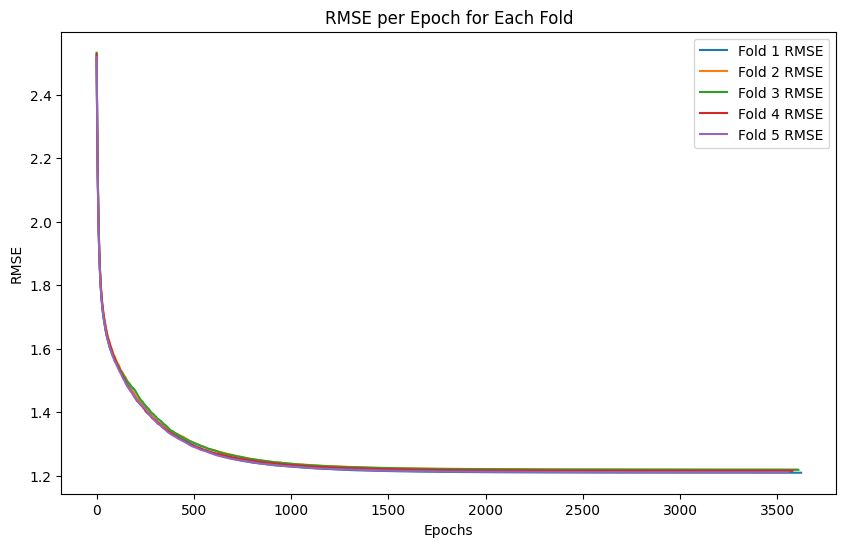

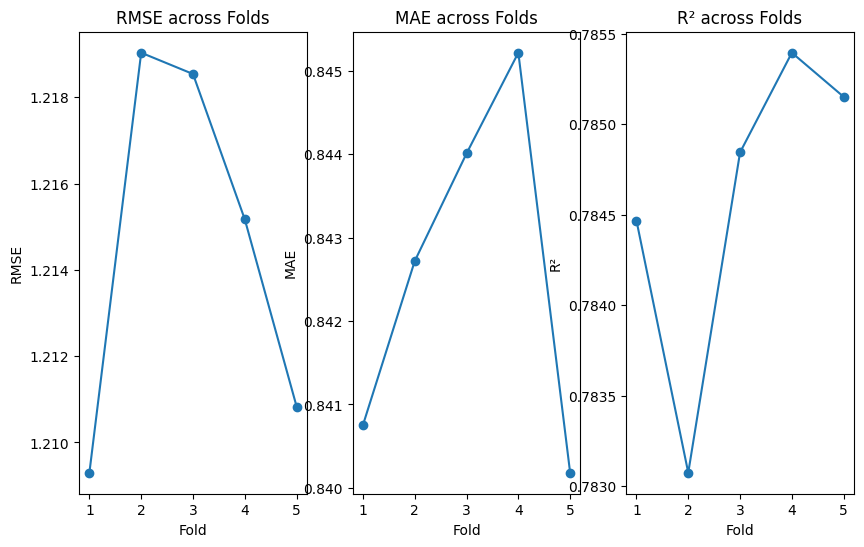

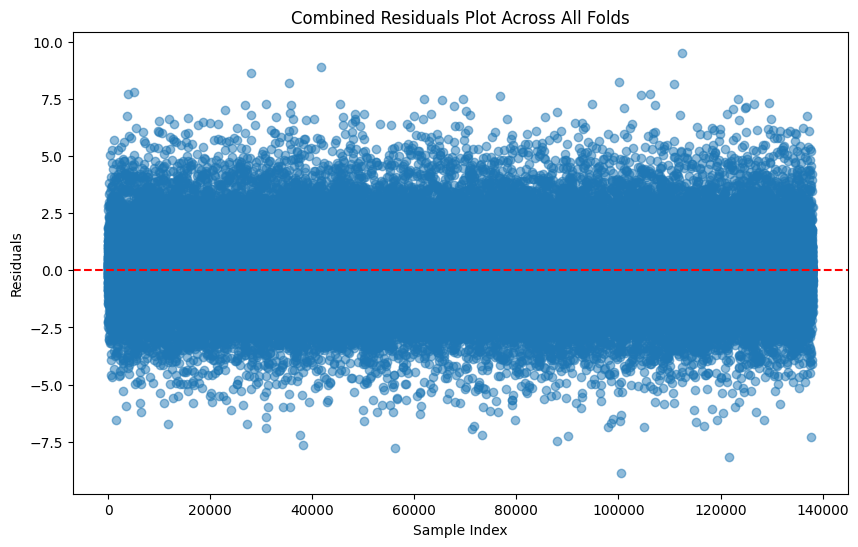

Best model saved as 'best_xgb_model.pkl'


<Figure size 640x480 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
import pickle  
# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True)

# Lists to store metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
all_residuals = [] 

# Initialize variable to store the best model
best_model = None
best_rmse = float('inf') 

fold = 1  # Counter for folds

# Create figure to plot RMSE across epochs for each fold
plt.figure(figsize=(10, 6))

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_scaled):
    # Split data into train and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
  
    # Initialize model with best parameters
    model =  XGBRegressor(
    objective='reg:squarederror', 
    n_estimators= 10000,
    device='cuda',
    random_state = 42,
    learning_rate = 0.075,
    max_depth= 10,  
    tree_method='gpu_hist')
    
    print(f"Training Fold {fold}...")
    
    # Train the model on the current fold’s data
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], 
              eval_metric="rmse", early_stopping_rounds=100, verbose=2000)
    
    # Retrieve RMSE during training
    eval_results = model.evals_result()
    epochs = len(eval_results['validation_0']['rmse'])
    rmse_per_epoch = eval_results['validation_0']['rmse']
    
    # Plot RMSE per epoch for this fold
    plt.plot(range(epochs), rmse_per_epoch, label=f'Fold {fold} RMSE')
    
    # Make predictions on the validation data for this fold
    y_pred = model.predict(X_val_fold)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    
    # Calculate residuals
    residuals = y_val_fold - y_pred
    all_residuals.extend(residuals) 
    
    # Append metrics for later
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    # Track the best model based on RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model  # Save the best model
        
    fold += 1
    
    

# Customize plot for RMSE per epoch
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("RMSE per Epoch for Each Fold")
plt.legend()
plt.show()

# Plot final metrics (MAE, RMSE, R²) across folds
plt.figure(figsize=(10, 6))

# Plot RMSE across folds
plt.subplot(1, 3, 1)
plt.plot(range(1, kf.get_n_splits() + 1), rmse_scores, marker='o')
plt.title("RMSE across Folds")
plt.xlabel("Fold")
plt.ylabel("RMSE")

# Plot MAE across folds
plt.subplot(1, 3, 2)
plt.plot(range(1, kf.get_n_splits() + 1), mae_scores, marker='o')
plt.title("MAE across Folds")
plt.xlabel("Fold")
plt.ylabel("MAE")

# Plot R² across folds
plt.subplot(1, 3, 3)
plt.plot(range(1, kf.get_n_splits() + 1), r2_scores, marker='o')
plt.title("R² across Folds")
plt.xlabel("Fold")
plt.ylabel("R²")

# Plot combined residuals across all folds
plt.figure(figsize=(10, 6))
plt.scatter(range(len(all_residuals)), all_residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Combined Residuals Plot Across All Folds")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")
plt.show()

# Save the best model to a file using pickle
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved as 'best_xgb_model.pkl'")

plt.tight_layout()
plt.show()


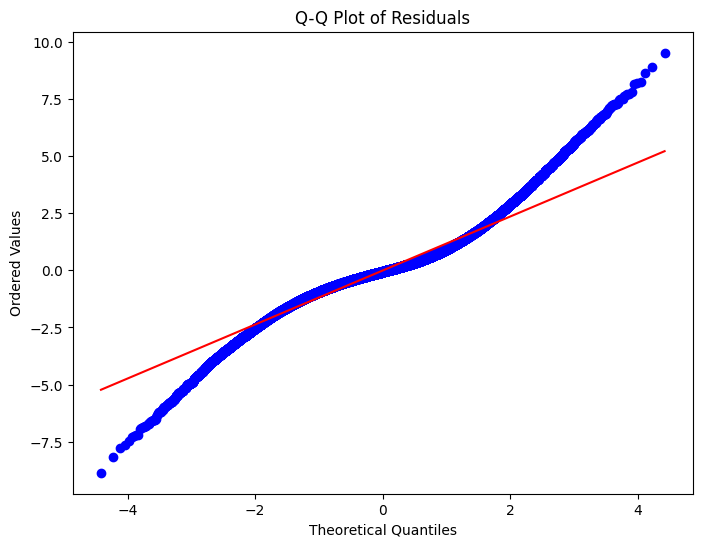

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assume residuals are stored in a list or array called `residuals`
residuals = np.array(all_residuals)  # Replace with your residuals data

# Generate Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.ylabel("Ordered Values")
plt.xlabel("Theoretical Quantiles")
plt.show()


In [78]:
# Load the saved model using pickle
with open('best_xgb_model.pkl', 'rb') as f:
    best_model = pickle.load(f)


RMSE: 1.2131165360853458
MAE: 0.8396976754109056
R²: 0.7821638461119043


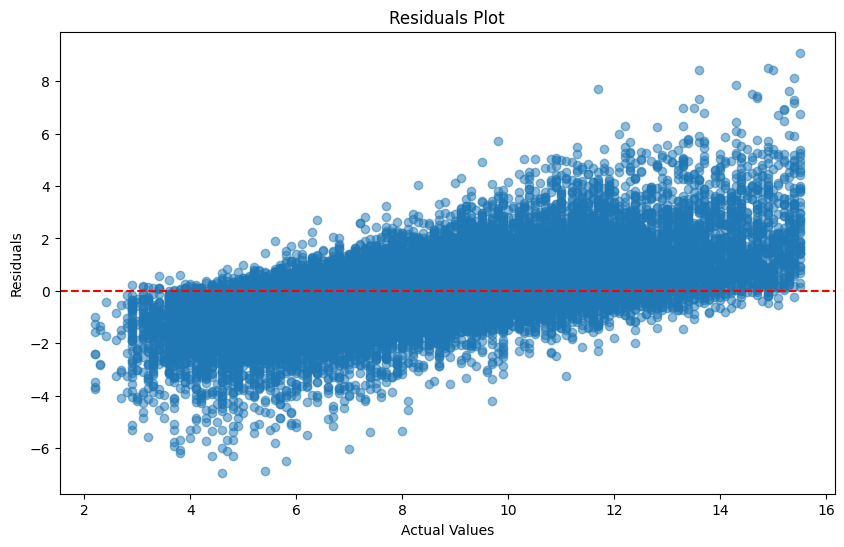

In [79]:
y_pred = best_model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
residuals = y_val - y_pred

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  #
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


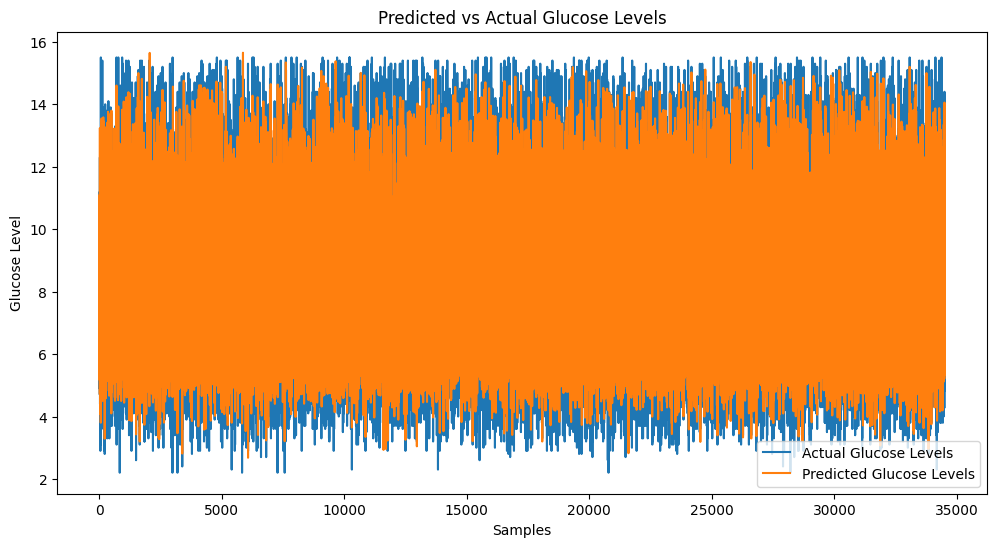

In [80]:
#Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual Glucose Levels')
plt.plot(y_pred, label='Predicted Glucose Levels')
plt.xlabel('Samples')
plt.ylabel('Glucose Level')
plt.title('Predicted vs Actual Glucose Levels')
plt.legend()
plt.show()

## Interference


In [81]:

# Use .loc[] to select columns by name
test_selected = imputed_test_df.loc[:, selected_features.index]

print(test_selected.columns)
print(len(test_selected.columns))

Index(['bg-0:00', 'bg-0:15', 'p_num', 'insulin-0:30', 'insulin-0:45',
       'insulin-0:15', 'time_in_seconds', 'bg-0:30', 'insulin-0:00',
       'cals-0:00', 'insulin-1:00', 'cals-1:30', 'bg-1:15', 'cals-0:15',
       'bg-1:45', 'cals-1:45', 'bg-2:00', 'cals-5:15', 'bg-1:30',
       'insulin-1:15', 'bg-1:00', 'bg-0:45', 'bg-5:30', 'insulin-5:15',
       'insulin-1:30', 'cals-2:45', 'cals-4:00', 'cals-0:45', 'cals-3:45',
       'cals-4:15', 'insulin-5:00', 'bg-3:15', 'bg-4:30', 'bg-3:30', 'bg-2:15',
       'insulin-5:45', 'cals-4:30', 'cals-5:45', 'insulin-1:45', 'cals-1:15',
       'cals-3:30', 'bg-2:45', 'bg-5:00', 'insulin-3:45', 'insulin-3:30',
       'insulin-4:45', 'insulin-5:30', 'cals-3:15', 'cals-5:00', 'bg-3:00',
       'bg-4:45', 'insulin-2:00', 'cals-1:00', 'insulin-2:45', 'cals-2:00',
       'bg-4:00', 'bg-2:30', 'cals-4:45', 'bg-5:45', 'cals-0:30',
       'insulin-4:30', 'insulin-3:15', 'cals-5:30', 'cals-3:00',
       'insulin-2:30', 'insulin-3:00', 'insulin-4:15', 'bg-3

In [82]:
# Transform the validation or test data using the already-fitted scaler
test_scaled = scaler.transform(test_selected)

In [83]:

y_test_pred = best_model.predict(test_scaled)



In [84]:
import pandas as pd

# Assuming you have the 'id' column in your test DataFrame
submission_df = pd.DataFrame({
    'id': sample['id'],  # Make sure to replace 'test['id']' with the actual name of your ID column if different
    'bg+1:00': y_test_pred  # Change the column name to match your requirements
})

# Display the first few rows of the submission DataFrame
print(submission_df.head())

# Save to CSV
submission_df.to_csv('submission.csv', index=False)
print(f'submission file saved successfully')

         id   bg+1:00
0  p01_8459  8.283545
1  p01_8460  6.084820
2  p01_8461  8.047514
3  p01_8462  9.770087
4  p01_8463  6.091145
submission file saved successfully
